<a href="https://colab.research.google.com/github/gr-uzun/urban-sounds/blob/main/Urban_Sounds_On_Isleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Önişleme - Notebook**

* Görüntüleri (spectrogramları) sırasıyla okuyarak, grayscale dönüşümü, resizing
ve normalizasyon yapın.
* Görüntüleri ait oldukları etiketlerle birlikte, [görüntü, etiket] formatında bir
listeye ekleyin.
* Bu listeyi kullanarak, X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini
oluşturun.
* Bu veri setlerini bilgisayarınıza kaydedin.

**Imports**

In [16]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy ,Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import openCV
import cv2

**Metadata yı oku.**

Google Drive işlemleri :
* **./drive/MyDrive/UrbanSound8K** dizini oluşturuldu.
* Yeni folder **./drive/MyDrive/UrbanSound_Spectrograms** dizini olusturuldu.
* spectrogram kısayolu buraya kopyalandı.

https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog

* Google Drive mount edildi.


In [17]:
# Read the data from UrbanSound8k.csv
data_frame = pd.read_csv("./drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")


In [18]:
print(type(data_frame))
print(data_frame.shape)

<class 'pandas.core.frame.DataFrame'>
(8732, 8)


In [19]:
#Use the .info() function to get more details
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [20]:
data_frame.shape

(8732, 8)

In [21]:
#Use the .head() function to check the dataset
data_frame.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [22]:
data_frame.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [23]:
image_width = 25
image_height = 25

In [24]:
# read image file,resize,then get gray scaled ,normalized_image
def get_normalized_image(image_file) :

  #reading the image to be normalized using imread() function
  image_read = cv2.imread(image_file)

  # resize image by specifying custom width and height
  image_resized = cv2.resize(image_read, (image_width, image_height))

  # converting the image to grayscale image
  gray_image = cv2.cvtColor(image_resized , cv2.COLOR_BGR2GRAY)

  #setting the array for resulting image after normalization
  result_image = np.zeros((image_width, image_height))

  #normalizing the given image using normalize() function
  normalized_image = cv2.normalize(gray_image, result_image, 0, 100, cv2.NORM_MINMAX)

  return normalized_image

**Read one spectrogram**


In [25]:
normalized_image = get_normalized_image('./drive/MyDrive/UrbanSound_Spectrograms/spectrograms/2/100263-2-0-117.png')

print(type(normalized_image))

print (normalized_image.shape)

<class 'numpy.ndarray'>
(25, 25)


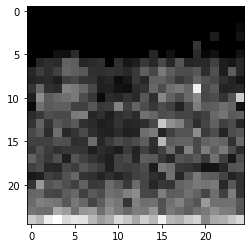

In [26]:
#displaying the normalized image as the output on the screen
plt.imshow(normalized_image, cmap="gray")

**Read all files from data frame (metadata)**

In [27]:
#Use the .info() function to get more details
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [28]:
def wav_to_png_file(wav_file_name) :

  split_string = wav_file_name.split(".")

  png_file_name = split_string[0] + ".png"

  return png_file_name

In [29]:
png_file_name = wav_to_png_file('100263-2-0-117.wav')

print(png_file_name)

100263-2-0-117.png


In [30]:
#Create an empty array for ClassId with the data type integer
arrClassId = np.array([],dtype=int)

for index, row in data_frame.iterrows():
  
  # print(index)

  remainder = index%500

  if (index > 0 and remainder == 0) :
    print(f'index : {index}')
    # break


  slice_file_name = row['slice_file_name']
  classID = row['classID']
  png_file_name = wav_to_png_file(slice_file_name)

  file_path = './drive/MyDrive/UrbanSound_Spectrograms/spectrograms/'+str(classID)+'/'+png_file_name

  normalized_image = get_normalized_image(file_path)

  # flattened_image = normalized_image.flatten()
  
  arrClassId= np.append(arrClassId , classID)

  if(index == 0) :

   # Create an empty array for Image with the data type integer
    arrImage = normalized_image;
  else :
    arrImage = np.concatenate((arrImage, normalized_image), axis=0, out=None)


index : 500
index : 1000
index : 1500
index : 2000
index : 2500
index : 3000
index : 3500
index : 4000
index : 4500
index : 5000
index : 5500
index : 6000
index : 6500
index : 7000
index : 7500
index : 8000
index : 8500


In [31]:
arrClassId

array([3, 2, 2, ..., 1, 1, 1])

In [32]:
arrClassId.shape

(8732,)

In [33]:
arrClassId.size

8732

In [34]:
arrImage

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [60, 83, 64, ..., 49, 75, 78],
       [93, 84, 89, ..., 54, 66, 72],
       [52, 62, 64, ..., 91, 97, 67]], dtype=uint8)

In [35]:
arrImage.shape

(218300, 25)

In [36]:
arrImage2 = arrImage.reshape((int(218300/image_width)),(image_width*image_height))

arrImage2

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 69, 77, 85],
       [ 0,  0,  0, ..., 88, 68, 66],
       ...,
       [ 0,  0,  0, ..., 34, 53, 46],
       [ 0,  0,  0, ..., 51, 41, 52],
       [ 0,  0,  0, ..., 91, 97, 67]], dtype=uint8)

In [37]:
arrImage2.shape

(8732, 625)

In [38]:
arrImage3 = np.empty(dtype=np.ndarray,shape=(arrClassId.size,))

i = 0

for x in arrImage2:
  arrImage3[i] = x.flatten()

  i = i + 1



**ClassId ve Image(flattened) bazında dataFrame olustur.**
(Görüntü,Etiket formatı)


In [39]:

df_image = pd.DataFrame()

df_image["Image"] = arrImage3

df_image["ClassId"] = arrClassId

df_image

,Image,ClassId
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
...,...,...
8727,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
8728,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
8729,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",1
8730,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


**DataFrame i dosyaya yaz.**

Baştan spectrogramları okuyarak Data Frame i yeniden oluşturmak çok uzun sürüyor.

Google Drive da kalıcı dosyaya yazılacak.Sonraki işlemler bu dosyadan okunarak yapılacak.

In [40]:
df_image.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_All.csv')

**DataFrame i Image_All.csv den okuyarak tekrar olustur.**

In [50]:
df_Image_All = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_All.csv')

df_Image_All

,Unnamed: 0,Image,ClassId
0,0,[ 0 0 0 0 0 0 0 0 0 0 0 ...,3
1,1,[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
2,2,[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
3,3,[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
4,4,[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
...,...,...,...
8727,8727,[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8728,8728,[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8729,8729,[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8730,8730,[ 0 0 0 0 0 0 0 0 0 0 0 ...,1


In [49]:
df_Image_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8732 non-null   int64 
 1   Image       8732 non-null   object
 2   ClassId     8732 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 204.8+ KB
